In [3]:
from tensorflow.keras.layers import Conv2D
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

float64
(427, 640, 3)


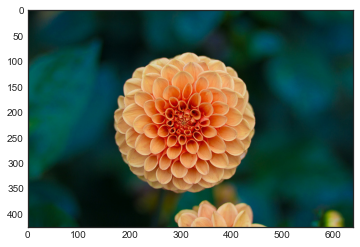

In [18]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)
plt.imshow(flower)
plt.show()

float64
(427, 640, 3)


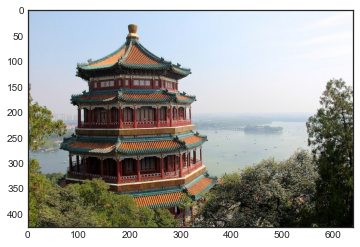

In [7]:
china = load_sample_image('china.jpg') / 255
print(china.dtype)
print(china.shape)
plt.imshow(china)
plt.show()

In [9]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [10]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

print(filters.shape)

(7, 7, 3, 2)


In [ ]:
conv = Conv2D(filters=16, kernel_size=3, activation='relu')

# 패딩(Padding)과 스트라이드(Stride)

### > 필터(커널) 사이즈와 함께 입력 이미지와 출력 이미지의 사이즈를 결정하기 위해 사용
### > 사용자가 결정할 수 있음

## 패딩(Padding)

1. 입력 데이터의 주변을 특정 값으로 채우는 기법
> 주로 0으로 많이 채움

##### 출력 데이터의 크기

(n + 2p - f + 1) X (n + 2p - f + 1)
> 입력 데이터의 크기(n) = 5, 필터의 크기(f) = 3, 패딩값(p) = 1

> (5 + 2 X 1 - 3 + 1) = 5

##### valid
> 패딩을 주지 않음

> padding = 0은 0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미

##### same
> 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같도록 유지

> 만약, 필터(커널)의 크기가 k 이면, 패딩의 크기는 p=k-1/2(단, stride=1)

## 스트라이드(Stride)

> 필터를 적용하는 간격을 의미



##### 출력 데이터의 크기

##### OH = H+2P-FH/S +1

##### OW = W+2P-FW/S +1

> 입력크기 : (H, W)

> 필터크기 : (FH, FW)

> 출력크기 : (OH, OW)

> 패딩, 스트라이드 : P, S

> 위 식의 값에서 H+2P-FH/S 또는 W+2P-FW/S 가 정수로 나누어 떨어지는 값이어야 함

> 정수로 나누어 떨어지지 않으면, 패딩, 스트라이드 값을 조정하여 정수로 나누어 떨어지게 해야함

In [30]:
conv = Conv2D(filters=16, kernel_size=3, padding='same', strides=1, activation='relu')

## 풀링(Pooling)

> 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

## 맥스 풀링(Max Pooling) @가장 많이 씀

가장 많이 사용되는 방법

출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일

##### OH = H+2P-FH/S +1

##### OW = W+2P-FW/S +1

일반적으로 stride=2, kernel_size=2 를 통해 특징맵의 크기를 절반으로 줄이는 역할

모델이 물체의 주요한 특징을 학습할 수 있도록 해주며, 컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌

예를 들어, 초록색 사각형 안에 2와 8 등이 있다고 가정한다면, 2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 함


In [13]:
from tensorflow.keras.layers import MaxPool2D

In [19]:
print(flower.shape)
flower = np.expand_dims(flower, axis=0)
print(flower.shape)

output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = MaxPool2D(pool_size=2)(output)
print(output.shape)

(427, 640, 3)
(1, 427, 640, 3)
(1, 213, 320, 32)


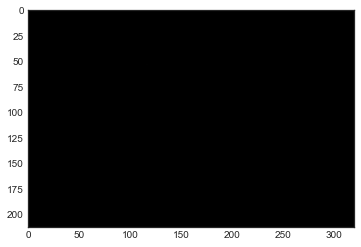

In [28]:
plt.imshow(output[0, :, :, 4], cmap='gray')
plt.show()

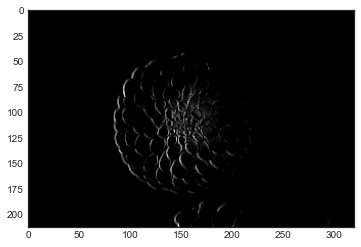

In [32]:
plt.imshow(output[0, :, :, 8], cmap='gray')
plt.show()

## 평균 풀링(Avg Pooling)

> 필터 내의 있는 픽셀값의 평균을 구하는 과정

> 과거에 많이 사용, 요즘은 잘 사용되지 않음

> 맥스풀링과 마찬가지로 stride=2, kernel_size=2를 통해 특징 맵의 사이즈를 줄이는 역할

In [33]:
from tensorflow.keras.layers import AvgPool2D

In [34]:
print(flower.shape)

output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = AvgPool2D(pool_size=2)(output)
print(output.shape)

(1, 427, 640, 3)
(1, 213, 320, 32)


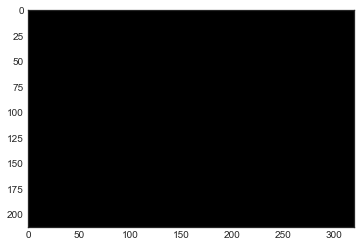

In [35]:
plt.imshow(output[0, :, :, 2], cmap='gray')
plt.show()

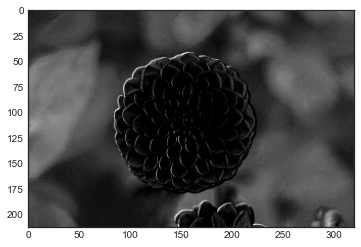

In [36]:
plt.imshow(output[0, :, :, 8], cmap='gray')
plt.show()

## 전역 평균 풀링(Global Avg Pooling)

> 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

> 출력층에는 유용할 수 있음

In [37]:
from tensorflow.keras.layers import GlobalAvgPool2D

In [39]:
print(flower.shape)

output = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(flower)
output = GlobalAvgPool2D()(output)
print(output.shape) # 위의 평균 풀링을 비교, 즉 절반값이(1, "213, 320", 32) 없어짐. 전역이라서

(1, 427, 640, 3)
(1, 32)


## 완전 연결 계층(Fully-Connected Layer)

> 입력으로 받은 텐서를 1차원으로 평면화(flatten)함

> 밀집 계층(Dense Layer)라고도 함

> 일반적으로 분류기로서 네트워크의 마지막 계층에서 사용

In [40]:
from tensorflow.keras.layers import Dense

In [41]:
output_size=64

In [44]:
fc = Dense(units=output_size, activation='relu')

## 유효 수용 영역(ERF, Effective Receptive Field)

- 입력 이미지에서 거리가 먼 요소를 상호 참조하여 결합하여 네트워크 능력에 영향을 줌

- 입력 이미지의 영역을 정의해 주어진 계층을 위한 뉴런의 활성화에 영향을 미침

- 한 계층의 필터 크기나 윈도우 크기로 불리기 때문에 RF(receptive field, 수용 영역)이라는 용어를 흔히 볼 수 있음

<img src="https://wiki.math.uwaterloo.ca/statwiki/images/8/8c/understanding_ERF_fig0.png">

  <sub>[이미지 출처] https://wiki.math.uwaterloo.ca/statwiki/index.php?title=Understanding_the_Effective_Receptive_Field_in_Deep_Convolutional_Neural_Networks</sub>

RF의 중앙에 위치한 픽셀은 주변에 있는 픽셀보다 더 높은 가중치를 가짐

> 중앙부에 위치한 픽셀은 여러 개의 계층을 전파한 값

> 중앙부에 있는 픽셀은 주변에 위치한 필셀보다 더 많은 정보를 가짐

가우시안 분포(=정규분포)를 따름

<img src="https://www.researchgate.net/publication/316950618/figure/fig4/AS:495826810007552@1495225731123/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks.png">

  <sub>[이미지 출처] https://www.researchgate.net/figure/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks_fig4_316950618</sub>

# CNN 모델 학습

## MNIST (LeNet)

- Yann LeCun 등의 제안(1998)
- 5 계층 구조: Conv-Pool-Conv-Pool-Conv-FC-FC(SM)
- 입력: 32x32 필기체 숫자 영상(MNIST 데이터)
- 풀링 : 가중치x(2x2블록의 합) + 편차항
- 시그모이드 활성화 함수 사용
- 성능: 오차율 0.95%(정확도: 99.05%)

In [46]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import mnist

import numpy as np

### 데이터 로드 및 전처리

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


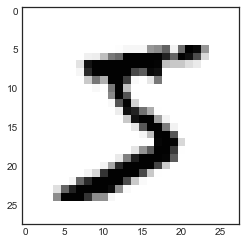

In [49]:
plt.imshow(x_train[0, :, :, 0])

In [50]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### 모델 구성 및 컴파일

In [51]:
num_classes = 10
epochs = 30
batch_size = 32

In [52]:
class LeNet5(Model):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.conv1 = Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu')
        self.conv2= Conv2D(16, kernel_size=(5, 5), activation='relu')
        self.max_pool = MaxPool2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')
        
    def call(self, input_data):
        x = self.max_pool(self.conv1(input_data))
        x = self.max_pool(self.conv2(x))
        x = self.flatten(x)
        x = self.dense3(self.dense2(self.dense1(x)))
        return x

In [53]:
model = LeNet5(num_classes)

In [54]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
callbacks = [EarlyStopping(patience=3, monitor='val_loss'), TensorBoard(log_dir='./logs', histogram_freq=1)]

### 모델 학습 및 평가

In [56]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5758 - accuracy: 0.8232 - val_loss: 0.1407 - val_accuracy: 0.9566
Epoch 2/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1272 - accuracy: 0.9610 - val_loss: 0.0852 - val_accuracy: 0.9731
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0712 - val_accuracy: 0.9764
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0614 - accuracy: 0.9813 - val_loss: 0.0572 - val_accuracy: 0.9815
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0570 - val_accuracy: 0.9809
Epoch 7/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0487 - val_ac

In [59]:
%load_ext tensorboard

In [60]:
%tensorboard --logdir logs

## Fashion MNIST

In [61]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [62]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [63]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 학습

- 임의의 모델

In [71]:
def build_model():
    model = Sequential()
    
    input = Input(shape=(28, 28, 1))
    output = Conv2D(filters=32, kernel_size=(3, 3))(input)
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)    
    output = Conv2D(filters=64, kernel_size=(3, 3))(output)
    output = Flatten()(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(64, activation='relu')(output)    
    output = Dense(10, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    
    return model


model_1 = build_model()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3965056   
                                                                 
 dense_7 (Dense)             (None, 64)                8256  

In [ ]:
hist_1 = model_1.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 66s 200ms/step - loss: 0.5028 - acc: 0.8213 - val_loss: 0.4207 - val_acc: 0.8474
Epoch 2/25
329/329 [==============================] - 68s 207ms/step - loss: 0.3404 - acc: 0.8749 - val_loss: 0.3582 - val_acc: 0.8733
Epoch 3/25
329/329 [==============================] - 75s 227ms/step - loss: 0.2854 - acc: 0.8939 - val_loss: 0.3556 - val_acc: 0.8717
Epoch 4/25
329/329 [==============================] - 76s 230ms/step - loss: 0.2454 - acc: 0.9094 - val_loss: 0.3743 - val_acc: 0.8721
Epoch 5/25
329/329 [==============================] - 73s 223ms/step - loss: 0.2071 - acc: 0.9244 - val_loss: 0.4010 - val_acc: 0.8728
Epoch 6/25
329/329 [==============================] - 71s 217ms/step - loss: 0.1801 - acc: 0.9330 - val_loss: 0.4456 - val_acc: 0.8599
Epoch 7/25
329/329 [==============================] - 69s 211ms/step - loss: 0.1696 - acc: 0.9373 - val_loss: 0.4604 - val_acc: 0.8644
Epoch 8/25
  2/329 [..............................] - E